1. Изобразить область интегрирования. Вычислить интеграл, расставив пределы интегрирования двумя способами:<br>
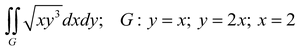


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from matplotlib import cm
import sympy as sp

x, y = sp.symbols('x y')

# 1 способ
f = sp.sqrt(x * y**3)

c, d = (x, 2*x)
a, b = (0, 2)

Iy = sp.integrate(f, (y, c, d))
Ix = sp.integrate(Iy, (x, a, b))

print(f'I = {Ix.evalf()}')

# 2 способ
a1, b1 = (y / 2, y)
a2, b2 = (y / 2, 2)
c1, d1 = (0, 2)
c2, d2 = (2, 4)

Ix1 = sp.integrate(f, (x, a1, b1))
Ix2 = sp.integrate(f, (x, a2, b2))

Iy1 = sp.integrate(Ix1, (y, c1, d1))
Iy2 = sp.integrate(Ix2, (y, c2, d2))

I = Iy1 + Iy2

print(f'I = {I.evalf()}')

I = 7.45096679918781
I = 7.45096679918781


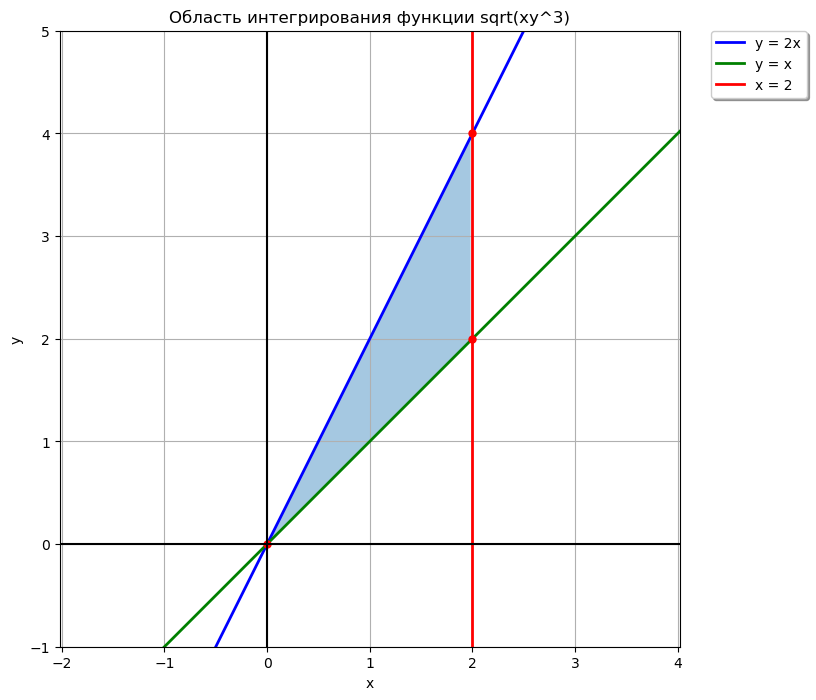

In [6]:
# Построение графиков
x = np.linspace(-20,20,1000)
plt.figure(figsize=(8, 8))

y1 = 2 * x
y2 = 1 * x

handle1, = plt.plot(x, y1, color='b', linewidth=2.0, label='y = 2x')

handle2, = plt.plot(x, y2, color='g', linewidth=2.0, label='y = x')

plt.axvline(x=2,  ymin=-5, ymax=49, color='r',
          linewidth=2.0, label='x = 2')

plt.fill_between(x, 2 * x, x, where=(x >= 0) & ( x <= 2 ), alpha=0.4)

plt.plot(2, 4, 'or', markersize=5)
plt.plot(0, 0, 'or', markersize=5)
plt.plot(2, 2, 'or', markersize=5)

plt.xlim(-1, 3)
plt.ylim(-1, 5)

plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

plt.grid()

plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Область интегрирования функции sqrt(xy^3)')

plt.legend(handles=[handle1, handle2])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.axis([0, 2, -1, 5])

plt.show()


2. Изобразить область интегрирования. Вычислить тройной интеграл <br>
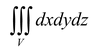<br>
где V ограничена поверхностями: <br>


In [7]:
x, y, z = sp.symbols('x y z')

#Рассчет
# Границы интегрирования для x
a, b = -1, 1
# Границы интегрирования для y
c, d = -((1 - x ** 2) ** 0.5), ((1 - x ** 2) ** 0.5)
# Границы интегрирования для z
e, f = 0, 1 - y

Iz = sp.integrate(1, (z, e, f))
Iy = sp.integrate(Iz, (y, c, d))
Ix = sp.integrate(Iy, (x, a, b))

# Выводим результат
print(f'I = {Ix.simplify().evalf()}')

I = 3.14159265358979


<Figure size 640x480 with 0 Axes>

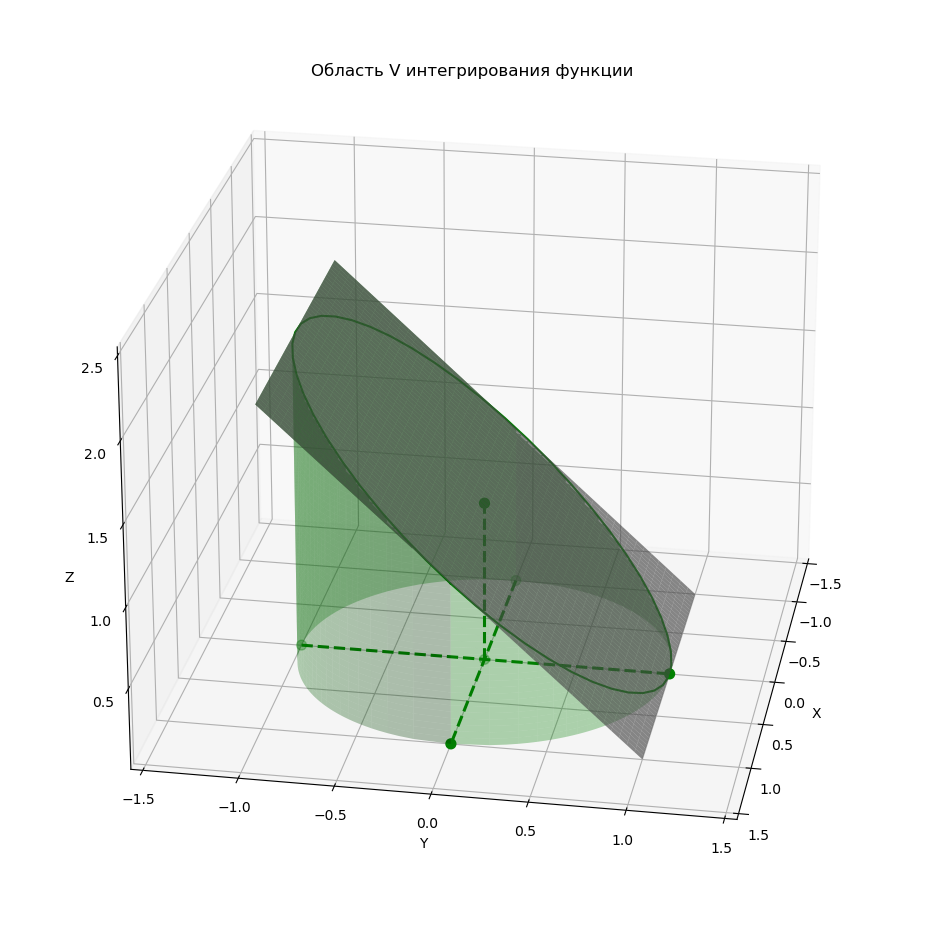

In [8]:
from mpl_toolkits import mplot3d

# Построение графиков
fig = plt.figure()
fig = plt.figure(figsize =(12, 12))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Цилиндр
x = np.linspace(-1, 1, 100)
z = np.linspace(0, 2, 100)
Xc, Zc = np.meshgrid(x, z)
Yc1 = np.minimum(np.sqrt(1 - Xc**2), 1 - Zc)
Yc2 = np.maximum(np.sqrt(1 - Xc**2), Zc - 1)

ax.plot_surface(Xc, Yc1, Zc, alpha=0.3, color='green')
ax.plot_surface(Xc, -Yc2, Zc, alpha=0.3, color='green')

# Поверхность
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)

X,Y = np.meshgrid(x,y)

Z = 1 - Y

ax.plot_surface(X, Y, Z, color='gray', alpha=0.65)

# Проекция на плоскость (для наглядности)
t = np.linspace(0, 2*np.pi, 50)
x = np.cos(t)
y = -np.sin(t)
z = 1 - y

ax.plot(x,y,z, color='g')

# добавляем проекцию кривой, заданной уравнением связи
t = np.linspace(0, 2*np.pi, 50)
x = np.cos(t)
y = np.sin(t)
z = t*0

# Построение интервала Z
ax.plot([0, 0], [0, 0], [0, 1], '--', linewidth = 2.2, color='green')
ax.scatter([0, 0], [0, 0], [0, 1], c='green', marker='.', s=200)

# Построение интервала X
ax.plot([-1, 1], [0, 0], [0, 0], '--', linewidth = 2.2, color='green')
ax.scatter([-1, 1], [0, 0], [0, 0], c='green', marker='.', s=200)

# Построение интервала Y
ax.plot([0, 0], [-1, 1], [0, 0], '--', linewidth = 2.2, color='green')
ax.scatter([0, 0], [-1, 1], [0, 0], c='green', marker='.', s=200)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(0.05, 2.5)

ax.set_title('Область V интегрирования функции', x = 0.5, y = 1.0)

ax.view_init(24, 10)